In [55]:
# standard imports
import sys, os, datetime, pandas as pd, warnings, importlib, xgboost, sklearn
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import frolic
importlib.reload(frolic)
warnings.filterwarnings("ignore")
%matplotlib inline

In [56]:
df = pd.read_csv('../data/tmp.csv')

# Explore

In [57]:
df.head()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count
0,49330014,How can I return all results from one table co...,<p>I have something like this:</p>\n\n<pre><co...,49330042.0,1,0,NaN,2018-03-16 21:51:38.587 UTC,NaN,2018-06-03 05:19:16.310 UTC,2018-06-03 05:19:16.310 UTC,NaN,2395282.0,NaN,1604072.0,1,0,mysql|sql,30
1,50663511,How to Change the format of values of a column...,<p>How to Change the 'n' number of timestamp i...,NaN,0,0,NaN,2018-06-03 05:18:45.117 UTC,NaN,2018-06-03 05:18:45.117 UTC,NaN,NaN,NaN,NaN,6897644.0,1,0,javascript|powershell|csv,2
2,50663510,How to design an online test website?,<p>My question revolves about the system desig...,NaN,0,0,NaN,2018-06-03 05:18:39.600 UTC,NaN,2018-06-03 05:18:39.600 UTC,NaN,NaN,NaN,NaN,9874027.0,1,0,system-design,2
3,13722144,folder permissions in liferay,<p>Can any one answer how to change folder per...,NaN,2,1,NaN,2012-12-05 11:21:59.887 UTC,NaN,2018-06-03 05:18:29.880 UTC,NaN,NaN,NaN,NaN,1878833.0,1,2,liferay-ide,1307
4,50662219,Memory Error while trying to read csv on AWS,"<p>When I am running the following code, I am ...",NaN,0,0,NaN,2018-06-03 00:09:14 UTC,1.0,2018-06-03 05:18:25.680 UTC,2018-06-03 05:18:25.680 UTC,NaN,2555451.0,NaN,9885542.0,1,0,python|amazon-ec2,8


In [58]:
df.dtypes

id                            int64
title                        object
body                         object
accepted_answer_id          float64
answer_count                  int64
comment_count                 int64
community_owned_date        float64
creation_date                object
favorite_count              float64
last_activity_date           object
last_edit_date               object
last_editor_display_name     object
last_editor_user_id         float64
owner_display_name           object
owner_user_id               float64
post_type_id                  int64
score                         int64
tags                         object
view_count                    int64
dtype: object

In [59]:
df.describe()

,id,accepted_answer_id,answer_count,comment_count,community_owned_date,favorite_count,last_editor_user_id,owner_user_id,post_type_id,score,view_count
count,1.000000e+03,1.750000e+02,1000.00000,1000.000000,0.0,162.000000,5.170000e+02,9.980000e+02,1000.0,1000.000000,1.000000e+03
mean,4.713473e+07,3.776890e+07,1.18000,1.732000,NaN,14.993827,4.747600e+06,6.040517e+06,1.0,9.313000,5.608378e+03
std,1.026877e+07,1.754691e+07,2.23217,2.763659,NaN,84.874880,3.237443e+06,3.365211e+06,0.0,160.271588,6.071712e+04
min,2.081050e+05,2.081060e+05,0.00000,0.000000,NaN,0.000000,-1.000000e+00,1.152200e+04,1.0,-9.000000,2.000000e+00
25%,5.064909e+07,2.435046e+07,0.00000,0.000000,NaN,1.000000,1.604243e+06,2.850438e+06,1.0,0.000000,1.000000e+01
50%,5.066245e+07,4.989288e+07,1.00000,1.000000,NaN,1.000000,5.007059e+06,6.754588e+06,1.0,0.000000,1.700000e+01
75%,5.066301e+07,5.066248e+07,1.00000,2.000000,NaN,3.750000,7.311767e+06,9.454364e+06,1.0,1.000000,3.400000e+01
max,5.066351e+07,5.066351e+07,34.00000,25.000000,NaN,816.000000,9.887077e+06,9.887097e+06,1.0,4759.000000,1.625704e+06


# ML

In [60]:
df['title_len'] = df['title'].str.len()
df['body_len'] = df['body'].str.len()

In [61]:
features = ['title_len', 'body_len', 'answer_count', 'comment_count', 'score']
target = 'view_count'

In [62]:
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.33, random_state=42)

In [63]:
model = xgboost.XGBRegressor(n_jobs=8)
model.fit(df_train[features], df_train[target])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=8, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [64]:
frolic.write_pickle(model, '../out/basic_model.pkl')

In [65]:
model.feature_importances_

array([ 0.02195122,  0.23170732,  0.50731707,  0.05121951,  0.18780488], dtype=float32)

# Predict

In [66]:
df_test['view_count_predict'] = model.predict(df_test[features])

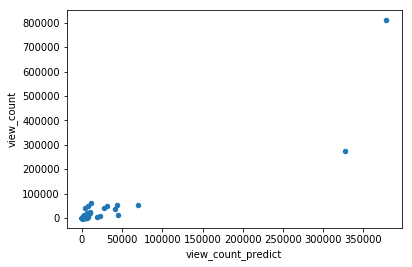

In [67]:
df_test.plot.scatter('view_count_predict', 'view_count')

In [68]:
df[features+[target]].describe()

,title_len,body_len,answer_count,comment_count,score,view_count
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03
mean,54.63800,1569.876000,1.18000,1.732000,9.313000,5.608378e+03
std,21.28657,1731.343275,2.23217,2.763659,160.271588,6.071712e+04
min,17.00000,77.000000,0.00000,0.000000,-9.000000,2.000000e+00
25%,40.00000,584.000000,0.00000,0.000000,0.000000,1.000000e+01
50%,51.50000,1028.500000,1.00000,1.000000,0.000000,1.700000e+01
75%,65.00000,1859.750000,1.00000,2.000000,1.000000,3.400000e+01
max,141.00000,20481.000000,34.00000,25.000000,4759.000000,1.625704e+06


In [69]:
ls = [{'title_len': 55, 'body_len': 1570, 'answer_count': 1, 'comment_count': 2, 'score': 9},
      {'title_len': 51, 'body_len': 1028, 'answer_count': 1, 'comment_count': 1, 'score': 0}]

In [71]:
model.predict(pd.DataFrame(ls)[features])

array([ 5695.87695312,   188.36068726], dtype=float32)